# Venkatesh Prasad Venkataramanan A53318036 Assignment 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
import MNISTtools

In [3]:
help(MNISTtools.load)

Help on function load in module MNISTtools:

load(dataset='training', path=None)
    Import either the training or testing MNIST data set.
    It returns a pair with the first element being the collection of
    images stacked in columns and the second element being a vector
    of corresponding labels from 0 to 9.
    
    Arguments:
        dataset (string, optional): either "training" or "testing".
            (default: "training")
        path (string, optional): the path pointing to the MNIST dataset
            If path=None, it looks succesively for the dataset at:
            '/datasets/MNIST' and './MNIST'. (default: None)
    
    Example:
        x, lbl = load(dataset="testing", path="/Folder/for/MNIST")



## Question 1

In [4]:
print ("Answer 1")

xtrain, ltrain = MNISTtools.load(dataset="training", path="/datasets/MNIST")#loaded data

print ("The shape of xtrain is :",xtrain.shape)
print ("The shape of ltrain is :",ltrain.shape)
print ("The size of the training dataset is : ",xtrain.shape[1])
print ("The feature dimension is : ",xtrain.shape[0])

Answer 1
The shape of xtrain is : (784, 60000)
The shape of ltrain is : (60000,)
The size of the training dataset is :  60000
The feature dimension is :  784


## Question 2

Answer 2


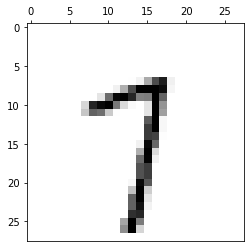

ltrain value for that index is : 7
They are similar


In [5]:
print ("Answer 2")

MNISTtools.show(xtrain[:, 42])#displaying the image at that index

print ("ltrain value for that index is :",ltrain[42])
print ("They are similar")

## Question 3

In [6]:
print ("Answer 3")

print("The minimum of xtrain is :",np.amin(xtrain))
print("The maximum of xtrain is :",np.amax(xtrain))
print("The type of xtrain is :",xtrain.dtype)

Answer 3
The minimum of xtrain is : 0
The maximum of xtrain is : 255
The type of xtrain is : uint8


## Question 4

In [7]:
print ("Answer 4")

xtrain = xtrain.astype(np.float32)#float conversion

def normalize_MNIST_images(x):
    x = -1.0 + (2*x)/255#mapping [0,255] to [-1,1]
    return x


xtrain = normalize_MNIST_images(xtrain)

Answer 4


## Question 5

In [8]:
print ("Answer 5")

def label2onehot(lbl):#function to convert labels to one-hot codes
    d = np.zeros((lbl.max() + 1, lbl.size))
    d[lbl, np.arange(lbl.size)] = 1
    return d

dtrain = label2onehot(ltrain)
print (dtrain[:,42])
print (ltrain[42])
print ("We can see that the one-hot code matches.")

Answer 5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
We can see that the one-hot code matches.


## Question 6

In [9]:
print ("Answer 6")

def onehot2label(d):#function to convert one-hot codes back to label
    lbl = d.argmax(axis=0)
    return lbl

ltrain = onehot2label(dtrain)
print("Converting back from one-hot to label :",ltrain[42])
print ("We can see that it matches ltrain[42]")

Answer 6
Converting back from one-hot to label : 7
We can see that it matches ltrain[42]


## Question 7

In [10]:
print ("Answer 7")

def softmax(a):#softmax function
    M = np.amax(a)
    num = den = np.exp(a - M)
    y= ((num)/(den.sum(axis=0)))
    return y   

Answer 7


## Question 10

In [11]:
print ("Answer 10")

def softmaxp(a,e):
    y =  softmax(a)
    element_wise = np.multiply(y,e)
    ans = ((element_wise) - (element_wise.sum(axis=0)*y))
    return ans
    

Answer 10


## Question 11

In [12]:
print ("Answer 11")

eps         = 1e-6                        # finite difference step
a           = np.random.randn(10, 200)    # random inputs
e           = np.random.randn(10, 200)    # random directions
diff        = softmaxp(a, e)
diff_approx = (softmax(a + eps*e) - softmax(a))/(eps)#the approximation formula
rel_error   = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()

print(rel_error, 'should be smaller than 1e-6')
print("As we can see, it is smaller than the said value")

Answer 11
5.051861861607455e-07 should be smaller than 1e-6
As we can see, it is smaller than the said value


## Question 12

In [13]:
print ("Answer 12")

def relu(a):
    return np.maximum(a, 0)

def relup(a,e):
    y = (a > 0) * e
    return y

eps         = 1e-6                        # finite difference step
a           = np.random.randn(10, 200)    # random inputs
e           = np.random.randn(10, 200)    # random directions
diff        = relup(a, e)
diff_approx = (relu(a + eps*e) - relu(a))/(eps)
rel_error   = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()

print(rel_error, 'should be smaller than 1e-6')
print ("As we can see, it is smaller than the said value")  

Answer 12
4.147808391169573e-11 should be smaller than 1e-6
As we can see, it is smaller than the said value


## Question 13

In [14]:
print ("Answer 13")

def init_shallow(Ni, Nh, No):#initiate a network of random values
    b1 = np.random.randn(Nh, 1)   / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni)  / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1)   / np.sqrt((Nh+1.))
    W2 = np.random.randn(No, Nh)  / np.sqrt((Nh+1.))
    return W1, b1, W2, b2

Ni = xtrain.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit = init_shallow(Ni, Nh, No)

Answer 13


## Question 14

In [15]:
print ("Answer 14")

def forwardprop_shallow(x, net):#forward propagate over the network
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]

    a1 = W1.dot(x) + b1
    #COMPLETE
    h1      = relu(a1)
    a2      = W2.dot(h1) + b2
    y       = softmax(a2)

    return y

yinit = forwardprop_shallow(xtrain, netinit)

Answer 14


## Question 15

In [16]:
print ("Answer 15")

def eval_loss(y, d):#evaluates average cross-entropy loss
    loss_vector = np.multiply(d,np.log(y))
    loss = - np.mean(loss_vector)
    
    return loss
    
print(eval_loss(yinit, dtrain), 'should be around .26')
print("Hence we can see that it satisfies the criteria")

Answer 15
0.2798442630796185 should be around .26
Hence we can see that it satisfies the criteria


## Question 16

In [17]:
print ("Answer 16")

def eval_perfs(y, lbl):#calculates percentage of misclassified samples
    c = np.equal(onehot2label(y), lbl)
    print (c)
    #c = np.sum(c)
    c = np.mean(c)*100
    return 100 - c
    
print("The percentage of misclassified samples is : ",eval_perfs(yinit, ltrain))
print("This is because since a random network is used for classification, there is 1/10 probability that the prediction is correct. Hence we are getting 90% misclassified samples.")

Answer 16
[False False False ... False False False]
The percentage of misclassified samples is :  84.035
This is because since a random network is used for classification, there is 1/10 probability that the prediction is correct. Hence we are getting 90% misclassified samples.


## Question 17

In [18]:
print ("Answer 17")

def update_shallow(x, d, net, gamma=.05):#updating weights and biases
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]
    gamma = gamma / x.shape[1] # normalized by the training dataset size
    # 
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    # 
    d2 = softmaxp(a2, -d/y)
    d1 = relup(a1, W2.T.dot(d2))
    # 
    W2 -= gamma*d2.dot(h1.T)
    W1 -= gamma*d1.dot(x.T)
    b2 -= gamma*d2.sum(axis=1).reshape(No,1)
    b1 -= gamma*d1.sum(axis=1).reshape(Nh,1)
    
    return W1, b1, W2, b2

print ("The proof has been attached.")

Answer 17
The proof has been attached.


## Question 18

In [19]:
print ("Answer 18")

def backprop_shallow(x, d, net, T, gamma = 0.05):#backpropagation function
    lbl = onehot2label(d)
    for t in range(T):
        net = update_shallow(x,d,net,gamma)
        y = forwardprop_shallow(x,net)
        loss = eval_loss(y,d)
        training_error = eval_perfs(y,lbl)
        print ("The loss is :",loss)
        print ("The training error is :",training_error)
        
    return net

nettrain = backprop_shallow(xtrain, dtrain, netinit, 2)
nettrain = backprop_shallow(xtrain, dtrain, netinit, 20)

Answer 18
[False False False ... False False False]
The loss is : 0.24643066862020943
The training error is : 86.56166666666667
[False  True  True ... False False False]
The loss is : 0.21458497587880035
The training error is : 77.66499999999999
[False  True False ... False False False]
The loss is : 0.20302100363945652
The training error is : 69.55
[False  True  True ... False False False]
The loss is : 0.19459569098275897
The training error is : 61.608333333333334
[False  True False ... False False False]
The loss is : 0.18663561633810807
The training error is : 58.501666666666665
[False  True  True ... False False False]
The loss is : 0.17892936321212605
The training error is : 52.71333333333333
[False  True False ...  True False False]
The loss is : 0.17165282837925724
The training error is : 51.31
[False  True  True ... False False False]
The loss is : 0.1648618877425437
The training error is : 46.39666666666666
[False  True False ...  True False False]
The loss is : 0.15869486872

In [23]:
print ("Answer 18 Contd")
print ("As we can see, the network has achieved training error of approx 31% after 20 iterations")

Answer 18 Contd
As we can see, the network has achieved training error of approx 31% after 20 iterations


## Question 19

In [22]:
print ("Answer 19")

xtest, ltest = MNISTtools.load(dataset = "testing", path = "/datasets/MNIST")
xtest = normalize_MNIST_images(xtest)
dtest = label2onehot(ltest)

print("The shape of xtest is:",xtest.shape)
print("The shape of ltest is:",ltest.shape)
print("The size of the testing dataset is : 10000")

y = forwardprop_shallow(xtest,nettrain)#testing on test data
loss = eval_loss(y,dtest)
testing_error = eval_perfs(y,ltest)

print("The loss is : ",loss)
print ("The testing error is: ",testing_error)

Answer 19
The shape of xtest is: (784, 10000)
The shape of ltest is: (10000,)
The size of the testing dataset is : 10000
[ True False  True ... False  True  True]
The loss is :  0.1568102540631892
The testing error is:  42.64


## Question 20 

In [24]:
print ("Answer 20")

def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):#minibatch gradient descent method
    N = x.shape[1]
    lbl = onehot2label(d)
    NB =int((N+B-1)/B)
    
    for t in range(T):
        for l in range(NB):
            idx = np.arange(B*l, min(B*(l+1), N))
            net = update_shallow(x[:,idx],d[:,idx],net,gamma)
        y = forwardprop_shallow(x, net)
        loss = eval_loss(y,d)
        training_error = eval_perfs(y,lbl)
        print(loss)
        print(training_error)
    return net

Answer 20


## Question 21

In [25]:
print ("Answer 21")

netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit, 5, B=100)
y = forwardprop_shallow(xtest,netminibatch)
loss = eval_loss(y,dtest)
testing_error = eval_perfs(y,ltest)

print("The loss is :",loss)
print ("The testing error is :", testing_error)

Answer 21
[ True  True  True ...  True  True  True]
0.03125747610318479
9.504999999999995
[ True  True  True ...  True  True  True]
0.0245181396793827
7.430000000000007
[ True  True  True ...  True  True  True]
0.020309724811249538
6.126666666666665
[ True  True  True ...  True  True  True]
0.017740092520085952
5.388333333333321
[ True  True  True ...  True  True  True]
0.015481566728655935
4.739999999999995
[ True  True  True ...  True  True  True]
The loss is : 0.039270899049870224
The testing error is : 12.200000000000003
